In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
# import keras
from tensorflow import keras
import numpy as np
import tensorflow_model_optimization as tfmot
from PIL import Image
import time
from utils import *
import matplotlib.pyplot as plt
import math


In [22]:
tflite_model = tf.lite.Interpreter(model_path='./model/newer/MobileNet.tflite')
tflite_model.allocate_tensors()

In [16]:
# tflite_model.get_tensor()
# tflite_model.get_tensor_details()[32]
# print(tflite_model.tensor(32))
print(tflite_model.invoke())

None


```
32 29

34, 28
36, 17
38, 9
40, 8
42, 7
44, 6
46, 5
48, 4
50, 3
52, 27
54, 26
56, 25
58, 24
60, 23
62, 22
64, 21
66, 20
68, 19
70, 18
72, 16
74, 15
76, 14
78, 13
80, 12
82, 11
84, 10


88 30
```

In [3]:
layer_list = [
    32, 29, 34, 28, 36, 17, 38, 9, 40, 8, 42, 7, 44, 6, 46, 5, 48, 4, 50, 3, 52, 27, 54, 26, 56, 25, 58, 24, 60, 23, 62, 22, 64, 21, 66, 20, 68, 19, 70, 18, 72, 16, 74, 15, 76, 14, 78, 13, 80, 12, 82, 11, 84, 10, 88, 30
]

for i in layer_list:
    print(tflite_model.get_tensor(i).shape)

(32, 3, 3, 3)
(32,)
(1, 3, 3, 32)
(32,)
(64, 1, 1, 32)
(64,)
(1, 3, 3, 64)
(64,)
(128, 1, 1, 64)
(128,)
(1, 3, 3, 128)
(128,)
(128, 1, 1, 128)
(128,)
(1, 3, 3, 128)
(128,)
(256, 1, 1, 128)
(256,)
(1, 3, 3, 256)
(256,)
(256, 1, 1, 256)
(256,)
(1, 3, 3, 256)
(256,)
(512, 1, 1, 256)
(512,)
(1, 3, 3, 512)
(512,)
(512, 1, 1, 512)
(512,)
(1, 3, 3, 512)
(512,)
(512, 1, 1, 512)
(512,)
(1, 3, 3, 512)
(512,)
(512, 1, 1, 512)
(512,)
(1, 3, 3, 512)
(512,)
(512, 1, 1, 512)
(512,)
(1, 3, 3, 512)
(512,)
(512, 1, 1, 512)
(512,)
(1, 3, 3, 512)
(512,)
(1024, 1, 1, 512)
(1024,)
(1, 3, 3, 1024)
(1024,)
(1024, 1, 1, 1024)
(1024,)
(43, 1024)
(43,)


For conv2d:

In [5]:
layer = tflite_model.get_tensor(32)

for i in range(len(layer)): # channel
    for j in range(3):
        for k in range(3):
            for l in range(3):
                print(layer[i][j][k][l], end=' ')
                # pass
    print()

layer = tflite_model.get_tensor(29)

# for i in layer:
#     print(dec2INT32InHex(i))

-17 -29 -42 15 69 -60 73 15 -77 56 -3 -19 -8 27 -105 24 -34 -115 46 70 -60 -51 -12 -127 -26 26 -124 
94 43 28 24 1 14 80 52 0 127 -5 81 124 -57 -26 -44 -50 98 25 117 -19 110 24 -12 64 64 -21 
99 52 23 25 -30 -2 23 -34 -38 118 76 -77 36 17 -48 18 57 25 127 -64 -92 19 -30 -94 27 -43 -39 
-46 80 118 17 121 28 -78 21 81 -4 18 127 -76 35 37 12 -35 7 9 53 69 16 24 58 -45 12 49 
72 -89 55 78 -108 -28 -29 -1 -30 71 4 32 127 -71 22 95 -102 86 2 -61 55 3 -79 55 124 -88 81 
-6 11 104 -65 21 123 -28 -16 33 69 62 73 -34 -25 109 -21 48 127 20 -18 75 18 -20 108 -13 72 39 
-43 73 58 31 22 101 13 63 49 18 56 106 -8 27 127 9 1 94 -72 -30 84 -73 57 109 -16 48 40 
96 -120 84 -45 -40 -24 56 -100 -38 19 -23 -49 22 -14 27 72 -127 68 -1 -28 -32 69 -107 61 76 -126 37 
-89 23 36 -31 26 -37 -66 -9 -58 -127 -62 -27 -81 -62 -34 -10 -87 -121 21 -74 -23 3 -32 -75 -27 73 -38 
-88 108 -38 -73 -10 42 19 -9 42 -58 82 125 31 -68 37 -117 -19 127 -68 119 21 -50 101 93 24 -28 0 
127 61 41 72 64 42 40 -19 53 90 51 -54 58 40 

For DW conv2d:

In [24]:
layer_dw = tflite_model.get_tensor(34)

for i in range(layer_dw.shape[3]):
    print('')
    for j in range(3):
        for k in range(3):
            print(layer_dw[0][j][k][i], end=", ")


34, -11, -42, 45, -7, -29, 15, -21, -14, 
37, 5, -34, -18, 17, -26, 1, -16, -36, 
-5, -10, -31, 1, 3, -46, 20, -19, -8, 
-8, -35, -13, -1, -44, -48, 9, 7, -46, 
-25, -28, -11, -26, 39, 12, 13, 74, 19, 
2, -12, -27, 9, -10, 24, 84, 56, -30, 
-5, -30, 2, 64, 54, 15, 40, 24, -20, 
-35, -45, -17, -49, -39, 12, -41, 10, 21, 
11, 18, 52, 28, -35, -4, -30, -35, -17, 
-34, 7, -46, -3, -26, -14, 12, -1, 7, 
-34, 24, 57, -16, 16, 49, -41, -13, 7, 
18, -9, 22, 82, 19, 27, 13, 10, -1, 
-19, 20, 42, -55, 8, 17, -8, -11, -20, 
-44, -47, -28, -33, -7, 14, -34, 15, -19, 
-19, -5, 8, -59, -34, 32, -29, 6, 34, 
22, -18, 18, -15, 18, 40, 1, 22, 4, 
35, -15, -20, 64, 127, 13, 9, 10, -8, 
-30, -10, 47, -24, 45, 10, -27, -7, 42, 
8, -11, -11, 72, 17, 19, 51, 37, -3, 
-11, 22, 37, -29, 9, -29, -43, -19, -18, 
-16, 40, 21, 31, 15, 0, 53, 33, 13, 
53, 12, 16, 43, -8, -45, 18, -40, -21, 
47, 22, -4, -20, 26, -35, -48, -26, -3, 
1, 6, 28, -41, -15, 54, -21, 34, 17, 
-13, -23, -12, -8, -36, 13, 13, 58, 47, 
42, 

For point conv2d:

In [21]:
layer_p = tflite_model.get_tensor(36)

for i in range(layer_p.shape[0]):
    for j in range(layer_p.shape[3]):
        # print(layer_p[i][0][0][j])

SyntaxError: unexpected EOF while parsing (<ipython-input-21-d2400df71290>, line 6)

In [7]:
from utils import *
dec2INT8InHex(-0)

tflite_model.invoke()

'00'

In [2]:

test_image = np.expand_dims(Image.open('test.jpg'), axis=0).astype(np.float32)

In [10]:
input  = tflite_model.get_input_details()[0]['index']
output = tflite_model.get_tensor_details()[33]['index']

tflite_model.set_tensor(input, test_image)

tflite_model.invoke()

pred = tflite_model.get_tensor(output)

print(pred + 126)

[[[[126 126 126 ... 126 126 126]
   [126 126 126 ... 126 126 126]
   [126 126 126 ... 126 126 126]
   ...
   [ -1  -1  -1 ...  -1  13   1]
   [  3   6   2 ...  -1  -1  -1]
   [ -1  -1  -1 ...   7  -1  -1]]

  [[ -1  -1  -1 ...  -1  -1  16]
   [ -1  -1  -1 ...  -1  -1  -1]
   [ -1   0  -1 ...  -1  -1  -1]
   ...
   [ -1   2  -1 ...  -1  -1  -1]
   [ -1  -1  -1 ...   3  -1  -1]
   [ -1  -1  -1 ...   4  -1  -1]]

  [[ -1  -1  -1 ...  -1  -1  -1]
   [  2  -1   1 ...  -1  -1  -1]
   [ 19  -1  -1 ...  -1  34   4]
   ...
   [ -1  -1  -1 ...  -1  -1  34]
   [  2  45  64 ...  -1  -1  90]
   [  1  21  23 ...  48  -1  -1]]

  ...

  [[ -1  -1   8 ...  19  -1  -1]
   [ -1   7  -1 ...  -1   5  -1]
   [ -1 104  20 ...  -1  -1  -1]
   ...
   [ 35  -1  15 ...  -1  -1   0]
   [  6  36  15 ...   2  12  -1]
   [ -1   2  -1 ...  -1  17  -1]]

  [[ -1   0  18 ...   1  -1  -1]
   [ -1  -1  -1 ...  -1  -1  -1]
   [ -1  -1  12 ...  -1  16  33]
   ...
   [ 13  -1  -1 ...  -1  23  -1]
   [ 47   6  -1 ...  -1  1

In [8]:
with open('model/newer/MobileNet.tflite', 'rb') as f:
    model_buffer = f.read()

model_buffer = buffer_change_output_tensor_to(model_buffer, 86)

inter = tf.lite.Interpreter(model_content=model_buffer)
inter.allocate_tensors()

input_index = inter.get_input_details()[0]['index']
output_index = inter.get_output_details()[0]['index']

inter.set_tensor(input_index, test_image)
inter.invoke()

pred = inter.get_tensor(output_index)

TypeError: Invalid shape () for image data

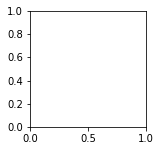

In [9]:
# print(pred[0,0,1,0:32] + 127)
# print(pred + 124)
# print(type(pred[0,0]))

# inter.get_tensor_details()[32]['quantization_parameters']['scales'].astype(float)

# for i in range(1):
#     for j in range(16):
#         for k in range(32):
#             print(pred[0, i, j, k] + 127, end=', ')
#         print()

# for i in range(32):
#     print(pred[0,1,2,i] + 124, end=', ')

# print(list(pred[0,111,111,0:32] + 127))
# print(list(pred[0,0,0,32:64] + 127))
# print(list(pred[0,111,111,32:64] + 127))
# for i in range(10):
# l = pred[0,0,0,0:32] + 124
# for i in l[::-1]:
#     print(dec2INT8InHex(i), end="")
# print()

# l = pred[0,55,55,0:32] + 127
# for i in l[::-1]:
#     print(dec2INT8InHex(i), end="")
# print(pred[0,111,111,:] + 127)

# for i in ((pred[0,:,:,0] + 126) *  0.02651895023882389):
#     for j in i:
#         print(j, end=', ')
#     print()

# print((pred[0,:,:,0] + 126) *  0.02651895023882389)

# plt.imshow(test_image[0] / 255)
plt.figure(figsize=(20, 20))
for i in range(32):
    plt.subplot(8, 4, i + 1)
    plt.imshow(pred[0,:,:,i] + 127, cmap=plt.cm.rainbow, vmin=0, vmax=127)
    # plt.colorbar()
    plt.xticks([])
    plt.yticks([])
# plt.colorbar()
plt.show()

In [55]:
# inter.get_tensor_details()[31]
print(inter.get_tensor_details()[31]['quantization_parameters']['scales'])
print(inter.get_tensor_details()[32]['quantization_parameters']['scales'])
print(inter.get_tensor_details()[33]['quantization_parameters']['scales'])

layer = inter.get_tensor(40)

for i in layer[31,0,0,:]:
    print(str(i) + ", ", end="")

layer = inter.get_tensor(8)
print(layer[31])
# print(layer[31,0,0,:])

# print(inter.get_tensor_details()[83]['quantization_parameters']['scales'])
# print(inter.get_tensor_details()[84]['quantization_parameters']['scales'])
# print(inter.get_tensor_details()[85]['quantization_parameters']['scales'])


[0.06055555]
[0.00282    0.00247493 0.00257003 0.0021742  0.00342313 0.00230613
 0.00278858 0.0040555  0.00178062 0.00257956 0.00241118 0.00269545
 0.00268308 0.00406876 0.00293506 0.00253528 0.00171844 0.00258374
 0.00159339 0.00249436 0.00321103 0.00417863 0.00162889 0.00238621
 0.00352958 0.00164555 0.00252153 0.00338113 0.00288072 0.00290598
 0.00243043 0.00273545 0.00270308 0.00224115 0.00313526 0.00251332
 0.00160392 0.00284438 0.00184967 0.00238457 0.0025061  0.0023855
 0.00339091 0.00216823 0.002106   0.00169307 0.00156868 0.00373754
 0.0013787  0.00325935 0.0025431  0.00164243 0.0023776  0.0031358
 0.00219148 0.00254989 0.00213936 0.00298242 0.00302201 0.00209746
 0.00183183 0.00205813 0.00294526 0.00274235 0.00285643 0.0030198
 0.00292393 0.00281243 0.00264538 0.0043047  0.00271001 0.00265528
 0.00171074 0.00256897 0.00151306 0.00304255 0.00281128 0.00254071
 0.00234846 0.00163819 0.00216422 0.00202297 0.00242817 0.00248742
 0.00258703 0.00270535 0.00308567 0.0028066  0.00293

In [15]:
import struct

layer_index = 32

Sx = inter.get_tensor_details()[layer_index - 1]['quantization_parameters']['scales'][0]
# Sw = 2.5518790e-05
Sa = inter.get_tensor_details()[layer_index + 1]['quantization_parameters']['scales'][0]

n = 30
l = []
shift_list = []
fraction_list = []
fraction_after_shift = []
final_shift = 0
M_list = []

for Sw in inter.get_tensor_details()[layer_index]['quantization_parameters']['scales']:
    M = (Sx * Sw) / Sa
    M_list.append(M)
    t = InterFrExp(M)
    fraction_list.append(t[0])
    shift_list.append(t[1])

shift_min = min(shift_list)
final_shift = n + abs(shift_min)

for i in range(len(fraction_list)):
    if shift_list[i] != shift_min:
        t_shift = abs(shift_min) - abs(shift_list[i])
        fraction_after_shift.append(fraction_list[i] >> t_shift)
    else:
        fraction_after_shift.append(fraction_list[i])

for i in range(len(fraction_list)):
    print(hex(fraction_list[i]), hex(fraction_after_shift[i]), M_list[i])

    # print(M, end='  ')
    # print(math.frexp(M), end='  ')
    # t = math.frexp(M)
    # M0 = int(t[0] * (2 ** (n + t[1])))
    # print(hex(M0), end='  ')
    # print(dec2INT32InHex(M0), end='  ')
    # M1 = int(M * (2 ** (32)))
    # print(hex(M1))
    # if M0 != M1:
    #     print(M, M0, M1, end='  ')
    # print(M0, M, M0 / (2 ** n) - M)
    # print('0x' + dec2INT32InHex(M0), end=', ')
#     l.append(dec2INT32InHex(M0))
# print(l[31])

0x7e20ed80 0x3f1076c0 0.00096228503
0x480bb280 0x2405d940 0.000549665
0x6c3a3a80 0x1b0e8ea0 0.0016514199
0x660c1d00 0x33060e80 0.00077855925
0x46a02e00 0x8d405c0 0.0021553254
0x5f2b0980 0x2f9584c0 0.0007260751
0x4868c680 0x24346340 0.00055243896
0x60829400 0x1820a500 0.0014726268
0x4c0eaa00 0x26075500 0.000580271
0x41af7000 0x106bdc00 0.0010022782
0x5b41ae00 0x2da0d700 0.0006962323
0x4d7d0b00 0x135f42c0 0.0011823799
0x76c62180 0x76c62180 0.00045308666
0x45cd3b80 0x11734ee0 0.0010650893
0x7b19c700 0x3d8ce380 0.00093918375
0x7e809e00 0x7e809e00 0.0004825684
0x72855400 0x3942aa00 0.00087372446
0x4933d680 0x2499eb40 0.0005584907
0x494f3180 0x1253cc60 0.0011186119
0x7b013380 0x3d8099c0 0.0009384513
0x6ccc3580 0x36661ac0 0.0008300605
0x57434100 0x2ba1a080 0.00066576165
0x46558100 0x11956040 0.0010732117
0x532e4f00 0x29972780 0.00063461985
0x71521e00 0x71521e00 0.00043228443
0x52f03b80 0x14bc0ee0 0.0012655397
0x5e4e0180 0x2f2700c0 0.00071948784
0x77c03900 0x3be01c80 0.00091362663
0x51d77a80 0

In [1]:
from utils import *
convert_h5_to_c_quant('model/newer/MobileNet.tflite', n=36)

In [31]:
# inter.get_tensor_details()[86]
# print()
pool_list = []
sum = np.int64

for c in range(1024):
    sum = 0
    for i in range(7):
        for j in range(7):
            sum += np.int64(pred[0, i, j, c] + 127)
    pool_list.append(sum)

In [10]:
Sx = 0.046231940388679504
Sa = 0.010589840821921825
Sw = 0.02040816326530612244897959183673

n = 31

M = (Sx * Sw) / Sa
M0 = int(M * (2 ** n))
print(M0, M, M0 / (2 ** n), M0 / (2 ** n) - M)
print(M0)

print((1596 * M0) >> n)

191331499 0.08909567229480274 0.08909567212685943 -1.6794331203495716e-10
191331499
142


In [90]:
print(type(pool_list[0]))
for c in range(1024):
    pool_list[c] = pool_list[c] * M0 >> n
print(pool_list)

<class 'numpy.int64'>
[4, 3, 1, 0, 142, 0, 4, 0, 80, 38, 64, 5, 22, 85, 2, 44, 84, 41, 0, 34, 71, 0, 3, 130, 8, 90, 5, 6, 44, 33, 0, 0, 59, 34, 68, 22, 2, 46, 81, 38, 61, 21, 3, 102, 17, 51, 31, 31, 12, 4, 0, 145, 0, 9, 1, 1, 30, 26, 0, 46, 8, 72, 33, 0, 8, 0, 0, 45, 69, 49, 47, 0, 26, 0, 3, 0, 60, 75, 5, 24, 5, 13, 6, 58, 53, 84, 11, 106, 65, 0, 12, 0, 51, 1, 159, 9, 91, 0, 6, 61, 150, 0, 0, 13, 8, 47, 12, 27, 32, 58, 1, 2, 7, 36, 196, 124, 67, 89, 0, 2, 42, 95, 22, 73, 110, 21, 0, 5, 8, 0, 0, 95, 76, 38, 1, 15, 132, 106, 29, 0, 7, 12, 11, 6, 0, 51, 4, 99, 15, 0, 51, 36, 77, 58, 50, 19, 58, 173, 12, 52, 61, 0, 21, 126, 51, 52, 22, 9, 10, 24, 1, 0, 0, 103, 3, 19, 68, 1, 1, 32, 79, 117, 37, 0, 61, 64, 0, 8, 19, 5, 3, 80, 0, 81, 11, 89, 51, 60, 7, 28, 86, 18, 0, 27, 0, 6, 7, 27, 2, 27, 35, 11, 33, 142, 9, 159, 43, 59, 44, 27, 161, 0, 63, 13, 28, 75, 5, 46, 11, 4, 29, 27, 11, 5, 60, 0, 2, 19, 26, 23, 5, 69, 27, 4, 36, 80, 0, 28, 49, 33, 34, 81, 58, 149, 3, 45, 110, 41, 27, 17, 16, 50, 7, 

In [38]:
# inter.get_tensor_details()[88]
inter.get_tensor(88)

array([[  4, -11,  -9, ..., -59,  21, -25],
       [  8,  13,   7, ...,  -5,  21,  -2],
       [-30, -18, -34, ..., -13,  -3, -12],
       ...,
       [-49, -41, -43, ...,  -8,  -9, -25],
       [-14, -58, -53, ..., -15,  39,  38],
       [-46,  38, -19, ..., -26,  12,  11]], dtype=int8)

In [34]:
Sx = 0.010589840821921825
Sa = 0.2866767346858978
Sw = 0.004745790734887123

M = (Sx * Sw) / Sa
M0 = int(M * (2 ** 25))
# print(M0, M, M0 / (2 ** n) - M)
print(M0)
dec2INT32InHex(M0)

5882


'000016fa'

In [42]:
fc_file = open('fc.h', 'w')

array = inter.get_tensor(88)
print(array.shape)
fc_file.write("static short fc_quant[][1024] = {\n")

for i in range(43):
    fc_file.write('    {')
    for j in range(1024):
        fc_file.write(str(array[i][j]) + ', ')
    fc_file.write('},\n')

fc_file.write('};\n')

array = inter.get_tensor(30)
fc_file.write("static int fc_quant_bias[] = {\n")
for i in range(43):
    fc_file.write(str(array[i]) + ', ')

fc_file.write('};\n')

fc_file.close()


(43, 1024)
